If you don't know what Linear Regression is, I highly recommend this awesome video : https://youtu.be/nk2CQITm_eo , <br>
but as a <strong>Big Picture</strong> Linear Regression is just fitting a line into a bunch of data points, a line that best minimizes the residual errors on the whole dataset (the line that gives us the best performance on the training data)
<img src='linear_regression_fitted_to_data_with_high_+correlation.PNG' width=700>

In [1]:
import numpy as np

In [2]:
class LinearRegression(object):
    def __init__(self, use_bias= True, normalize=True, regularization=None, iterations=1000, 
                 learning_rate=.01, l2_ratio=1., l1_ratio=1.):
        self.normalize = normalize #normalize the data before training 
        self.regularization = regularization #choose between l1, l2 regularization if it's none then no regularization will be used 
        self.__mean, self.__std = None, None #calculated from the training data and applied for each new sample we want to predict
        self.use_bias = use_bias #adding the intercept term 
        self.weights = None #weights, or weights[-1] is the bias
        self.iterations= iterations #how many times weights will be updated
        self.learning_rate = learning_rate #from the whole step how much you want to go down(low learning rate means you want to go slowly downhill, high learning rate means you gonna go down faster and that generally leads to an overfit and we don't want that)
        self.isfitted = False #model not trained otherwise True means the model is trained
        self.l2_ratio = l2_ratio #how much the sum of squared weights is going to contribute to the gradients
        self.l1_ratio = l1_ratio #how much the sum of absolute value of the weights is going to contribute to the gradients
    def fit(self, x, y):
        x, y = np.c_[x], np.c_[y] #we change the shape of the two arrays to 2D
        def gradients(x, y, weights, reg): #this function will calculate the gradients at each step (dloss/dweights)
            if reg == None: #if no regularization then calculate the gradients from the diffrentiated equation of the loss (dmean_squared_error/dweights) 
                return 1/x.shape[0] * (x.dot(weights.T).reshape(-1, 1) - y).T.dot(x)
            elif reg.lower() == 'l2':#if l2 regularization then calculate the gradients from dmean_squared_error/dweights + sum(weights**2)
                return 1/x.shape[0] * (x.dot(weights.T).reshape(-1, 1) - y).T.dot(x) + self.l2_ratio*weights**2
            elif reg.lower() == 'l1':#if l1 regularization then calculate the gradients from dmean_squared_error/dweights + sum(|weights|)
                return 1/x.shape[0] * (x.dot(weights.T).reshape(-1, 1) - y).T.dot(x) + self.l1_ratio*np.abs(weights).sum()
        if self.normalize:#if normalization argument is set to True then normalize it
            self.__mean = x.mean(axis=0)
            self.__std = x.std(axis=0)
            x = (x - self.__mean)/self.__std #Z score normalization
        if self.use_bias:#if use_bias argument is set to True then number weights equal should be number of features + 1 (for the bias value)
            self.weights = np.array(np.random.normal(0, 10, x.shape[1]+1)).reshape(1, -1)
            x = np.column_stack([x, np.ones(x.shape[0])])
        else:#if use_bias argument is set to False then number of weights should be equal to number of features
            self.weights = np.array(np.random.normal(0, 10, x.shape[1])).reshape(1, -1)   
            
        for i in range(self.iterations):#[Model training part] it's just updating the weights at each step to arrive to the weights that produces the least loss value
            self.weights = self.weights - self.learning_rate*gradients(x, y, self.weights, self.regularization)
        print('Done!')
        self.isfitted = True
        
    def predict(self, x):#making new predictions
        x = np.c_[x]
        if self.normalize:
            x = (x - self.__mean)/self.__std
        if self.use_bias:
            x = np.column_stack([x, np.ones(x.shape[0])])
        return x.dot(self.weights.T)
    
    def __str__(self):
        return 'LinearRegression(use_bias={}, normalize={}, regularization={}, iterations={}, learning_rate={})\
        '.format(self.use_bias, self.normalize, self.regularization, self.iterations, self.learning_rate)+'\n isFitted : {}'.format(self.isfitted)
                
            
        
        
        

In [3]:
#Let's Try it :DD

In [4]:
x = np.random.normal(0, 100, (100, 1))
y = 3*x+2.2
#let's add some noise 
y = y + np.random.randint(0, 100, (100, 1))

In [5]:
LinearR = LinearRegression()
LinearR.fit(x, y)

Done!


In [6]:
print(LinearR)

LinearRegression(use_bias=True, normalize=True, regularization=None, iterations=1000, learning_rate=0.01)        
 isFitted : True


In [7]:
#let's give it some values that it never seen, and it should output roughly : 3*given_value+2.2
values = [1000, 500, 275, 211, 689, 812, 135, 353]
for value in values:
    print('Value = [[{}]] | Real output : [[{}]] | Prediction : {}'.format(value, 3*value+2.2, LinearR.predict(value)))


Value = [[1000]] | Real output : [[3002.2]] | Prediction : [[3042.87224498]]
Value = [[500]] | Real output : [[1502.2]] | Prediction : [[1546.59981841]]
Value = [[275]] | Real output : [[827.2]] | Prediction : [[873.27722646]]
Value = [[211]] | Real output : [[635.2]] | Prediction : [[681.75435586]]
Value = [[689]] | Real output : [[2069.2]] | Prediction : [[2112.19079566]]
Value = [[812]] | Real output : [[2438.2]] | Prediction : [[2480.27381259]]
Value = [[135]] | Real output : [[407.2]] | Prediction : [[454.32094702]]
Value = [[353]] | Real output : [[1061.2]] | Prediction : [[1106.695725]]


In [8]:
#the real and prediction values are roughly the same, if we didn't add that noise the results would be whole better

In [9]:
import seaborn as sns

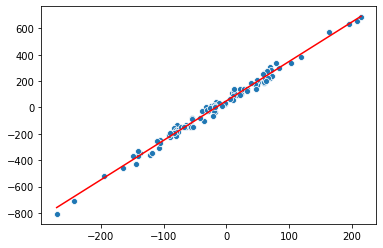

In [10]:
sns.scatterplot(x=x.reshape(-1), y=y.reshape(-1))
sns.lineplot(x=x.reshape(-1), y=LinearR.predict(x).reshape(-1), color='red')#it did it's job correctly :))